In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
# BERLIN52

n = 52
print(f'Problem size: {n}')

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


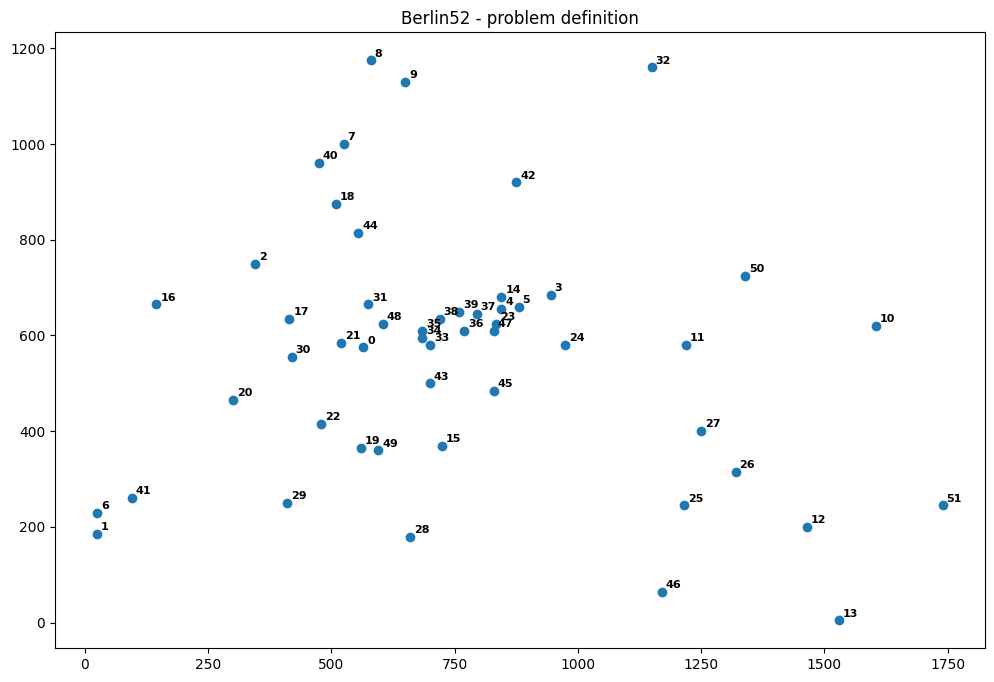

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 1200x800 with 0 Axes>

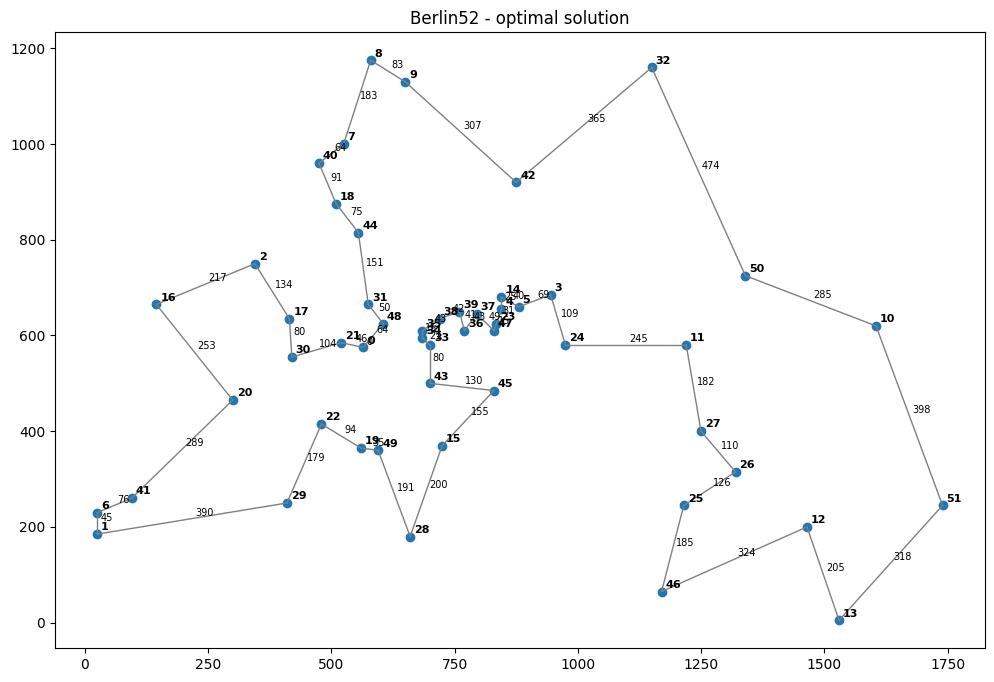

In [4]:
from matplotlib.lines import Line2D

route = p

    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))
    
    plt.plot(coords[:, 0], coords[:, 1], 'o')
    
    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})
    
    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
             (coords[0, 1] + coords[route[0], 1])/2 + 6,
             '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                 (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                 '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
             (coords[route[-1], 1] + coords[0, 1])/2 + 6,
             '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})
    
    plt.title('Berlin52 - optimal solution')
    
    plt.show()

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)


7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [7]:
sorted(np.random.choice(7, size=2, replace=False).tolist())

[0, 3]

In [8]:
def PMX(ind1, ind2):
    child1 = np.zeros(ind1.shape)
    child2 = np.zeros(ind2.shape)
    begining, end = sorted(np.random.choice(ind1.shape[0], size=2, replace=False).tolist())
    
    # begining, end = np.random.randint(low=0, high=ind1.shape[0]+1, size=(2,)).tolist()
    # begining, end = (3, 7)
    # print(begining, end)
    child1 = np.ones(ind1.shape)*-1
    child2 = np.ones(ind1.shape)*-1
    child1[begining:end+1] = ind2[begining:end+1]
    child2[begining:end+1] = ind1[begining:end+1]
    mapping_1_to_2 = {ind2[i]: ind1[i] for i in range(begining, end+1)}
    mapping_2_to_1 = {ind1[i]: ind2[i] for i in range(begining, end+1)}

    for i in [i for i in range(ind1.shape[0]) if i < begining or i > end]:
        if ind1[i] not in child1:
            child1[i] = mapping_1_to_2.get(ind1[i], -1)
        if ind2[i] not in child2:
            child2[i] = mapping_2_to_1.get(ind2[i], -1)

    freeindices1 = set([i for i in range(ind1.shape[0]) if i not in child1.tolist()])
    freeindices2 = set([i for i in range(ind1.shape[0]) if i not in child2.tolist()])

    for i in [i for i in range(ind1.shape[0]) if i < begining or i > end]:
        if child1[i] == -1:
            child1[i] = freeindices1.pop()
        if child2[i] == -1:
            child2[i] = freeindices2.pop()
    
    if np.unique(child1, axis=0, return_counts=True)[1].max() > 1 or np.unique(child2, axis=0, return_counts=True)[1].max() > 1:
        print(ind1)
        print('*'*40)
        print(ind2)
        print('*'*40)
        print(begining, end)
        print('*'*40)
        print(child1)
        print(np.unique(child1, axis=0, return_counts=True))
        print('*'*40)
        print(child2)
        print(np.unique(child2, axis=0, return_counts=True))
        raise Exception('Nonunique entries')
    
    return child1, child2

In [9]:
PMX(np.array([
    4,3,2,5,1,6
    ]),
    np.array([
    1,5,4,3,6,2
    ]))

(array([0., 1., 2., 3., 6., 4.]), array([0., 2., 3., 5., 1., 4.]))

In [10]:
size = 5
for _ in range(1000):
    PMX(np.random.choice(size, size=(size,), replace=False), np.random.choice(size, size=(size,), replace=False))

In [11]:
def are_uqniue_genes_in_population(p):
    if np.unique(p, axis=0, return_counts=True)[1].max()>1:
        raise Exception('Nonunique entries', p)

In [12]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    # j=8
    # print(i, j)
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [15]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 500

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # print('Parent check')
    # are_uqniue_genes_in_population(current_population)
    
    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            # print('PMX')
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
        else:
            # print('not PMX')
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # print(f'Initial Children check')    
    # are_uqniue_genes_in_population(children_population)
    
    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # print(f'Children mutation check')    
    # are_uqniue_genes_in_population(children_population)
    
    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    # print(f'Post replacement check')    
    # are_uqniue_genes_in_population(current_population)
    
    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics
    if best_objective_value < objective_values[0]:
        best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]

    print(" ".join([str(round(item, 4)) for item in [t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()]]))

0 0.4316 21774.0932 26095.4708 28659.0555 1866.9742
1 0.7835 21394.2228 23362.8421 24722.9805 778.6428
2 1.1533 20804.2084 22452.1239 23069.5197 370.6605
3 1.5232 20782.2516 22112.2675 22295.8274 205.5649
4 1.9627 20782.2516 21996.4568 22205.6177 270.5008
5 2.327 20782.2516 21775.2629 22117.0231 326.1108
6 2.7014 20523.5856 21575.0744 21935.6746 342.2565
7 3.0719 19786.8476 21357.7821 21822.9414 357.2411
8 3.4945 19483.0103 21144.1901 21630.4465 318.5824
9 3.8822 19060.6073 20975.5759 21333.2076 328.4868
10 4.2635 19060.6073 20814.9861 21229.0769 340.7069
11 4.6502 19060.6073 20660.2098 21017.9124 374.9428
12 5.0167 19060.6073 20482.2431 20897.7532 406.027
13 5.4003 19060.6073 20317.0731 20804.2084 415.692
14 5.7638 19060.6073 20127.7302 20635.3736 387.2819
15 6.1175 19060.6073 19951.8987 20444.2549 352.5602
16 6.5143 18693.2452 19817.1026 20303.5314 317.8828
17 6.876 18691.5659 19661.118 20098.0798 282.8208
18 7.3202 18691.5659 19569.1439 19925.2054 263.7939
19 7.6744 18691.5659 19461